# Subject of Subjectivity: The Global Happiness Index

Author: Rachel Bronder
rbronder@uci.edu
Course Project, UC Irvine, Math 10, S23

## Introduction

In this project, I will be analyzing the global Happiness Index for 2018, a dataset I found on Kaggle at https://www.kaggle.com/datasets/sougatapramanick/happiness-index-2018-2019?resource=download&select=2018.csv . The abstract of the dataset mentions that there is a relationship between several independent variables, including "GDP per capita," "freedom to make life choices," "health life expectancy," "perception of corruption," and "social support", and the dependent variable of the happiness score. I would like to acknowledge that at the time I am creating this project, which is June 2023, this data is from about 5 years ago. Therefore, some of the rankings may be outdated. 


My goal for this project is to see how the factors of the happiness score and happiness ranking relate with one another. Can any connections be made between one column category and another? How does the ranking correlate to any of the particular factors?

![Picture title](image-20230614-193444.png)

## Taking a look at the data

Before we do anything with our dataset, lets see what we are working with.

In [1]:
import pandas as pd
import seaborn as sns
import altair as alt

In [2]:
df = pd.read_csv('2018.csv')

In [3]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


I am cleaning up the data, removing any rows with not-a-number values.

In [4]:
df = df.dropna(axis=0)
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [5]:
type(df["Country or region"])

pandas.core.series.Series

In [6]:
df.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [7]:
df.shape

(156, 9)

In [8]:
c1 = alt.Chart(df).mark_bar().encode(
    x = "Country or region",
    y = "Score"
)
c1
#Here we see a bar graph of each country where the bar is raised to the level 
#of it's corresponding happiness score

alt.Chart(...)

In [9]:
alt.Chart(df).mark_geoshape().encode(
        color = "Overall rank")

alt.Chart(...)

In [10]:
import altair as alt
from vega_datasets import data
import geopandas as gpd

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
gdf_ne = gpd.read_file(url)  # zipped shapefile
gdf_ne = gdf_ne[["NAME", "CONTINENT", "POP_EST", 'geometry']]

alt.Chart(gdf_ne).mark_geoshape().encode(
    color = "Overall rank"
)

ValueError: Overall rank encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

alt.Chart(...)

Above, I'm trying to model the data with some kind of world map visualization. This is proving to be harder than expected, so I may come back to this later.

## Utilizing train_test_split on our data
I am looking to see if I can apply machine learning to this set. To begin, we need something true or false to use train_test_split. Lets try if it is true or false that the country's score falls into the upper quartile of rankings (meaning from bottom of 156 to 1, this will be the scores in the range of (156/4) to 1) 

In [11]:
156/4

39.0

In [12]:
df["Upper Quartile"] = df["Overall rank"] <= 38
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Upper Quartile
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,True
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,True
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,True
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,True
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,True
...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,False
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,False
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,False
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,False


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Upper Quartile'],
      dtype='object')

In [15]:
from pandas.api.types import is_numeric_dtype

In [16]:
features = ([x for x in df.columns if is_numeric_dtype(df[x])])
del features[0]
del features[0]
del features[-1]
features

['GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df[features],df["Upper Quartile"])

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf = LogisticRegression(random_state=0)

In [20]:
clf.fit(X_train,y_train)

LogisticRegression(random_state=0)

Now, lets see the the score of the training and test sets.

In [21]:
print(f"The score of the training set is {clf.score(X_train,y_train)}")
print(f"The score of the test set is {clf.score(X_test,y_test)}")

The score of the training set is 0.8888888888888888
The score of the test set is 0.8461538461538461


In [22]:
df["Pred"] = clf.predict(df[features])
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Upper Quartile,Pred
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,True,True
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,True,True
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,True,True
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,True,True
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,True,True
...,...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,False,False
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,False,False
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,False,False
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,False,False


We see from above that our model did a fairly accurate job of predicting whether or not the country would fall in the upper quartile of scores based on the numerical categories. This took some trial and error, as at first, the training set score was 1.0, meaning it was 100% accurate. I thought this would be unlikely to actually occur, so I looked at what I was including in "features" that train_test_split was acting on. I realized I deleted the overall rank, which was necessary so that the trained data would not include where the countries had been clearly ranked. But I also needed to remove the "score" column from "features" because the ranking was based entirely on the total score! So no wonder the 38 countries with the highest score were being placed in the upper quartile. When I removed this column too, then the scores decreased, and the model seemed a bit more realistic.

Analyzing the "Pred" column, there is a lot of consistency between it and the Upper Quartile column on the extremes of the rankings. In other words, the first 10 countries, which truly do fall in the upper quartile based on their ranking, are predicted as True. The last few dozen countries, which are at the bottom of the rankings and therefore do not fall into the upper quartile, are predicted to be false accurately. It is in the middle zone where there is some disconnect. Many rows where the country actually does fall in the upper quartile are predicted as False. Something fascinating as well is that, at the top of the "Pred" column, it shows the percent of data that is either true or false. In the "Pred" column, only 18.6% of the data falls into the True category. This is interesting as a quartile is supposed to be a quarter of the data, yet this is less than 20%.

## Finding relationships using regression

Between the factors that go into the overall score of a country's level of happiness, there may be some sort of relationship. I will analyze these with some polynomial regression. Let's visualize the data points with a chart first.

In [23]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Upper Quartile,Pred
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,True,True
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,True,True
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,True,True
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,True,True
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,True,True


In [24]:
c2 = alt.Chart(df).mark_circle().encode(
    x = "GDP per capita",
    y = "Healthy life expectancy",
    tooltip = "Country or region"
)
c2

alt.Chart(...)

Based on what we see here, this relationship may be best suited to linear regression, but we can also try polynomial regression. To add some nuance, I want to add another column to the dataset that shows the continent of each country, and display this through color on the chart. I do not know of any formal way to command Python to group country names to a continent, so I will hard code this.

### Utilizing some feature engineering

In [25]:
df["Continent"] = ["Europe", "Europe", "Europe", "Europe", "Europe", "Europe", "North America", "Australia/Oceania", "Europe", "Australia/Oceania", "Europe", "Europe", "North America", "Europe", "Europe", "Europe", "Europe", "North America", "Asia", "Asia", "Europe", "Europe", "Europe", "North America", "South America", "Asia", "South America", "South America", "South America", "South America", "South America", "Asia", "Asia", "Asia", "Asia", "Europe", "South America", "North America", "Europe", "South America", "South America", "Europe", "Asia", "Europe", "Asia", "Asia", "Europe", "South America", "South America", "Europe", "Europe", "Europe", "Europe", "Asia", "Africa", "North America", "Asia", "Europe", "Europe", "Asia", "Europe", "South America", "Europe", "South America", "South America", "Europe", "Europe", "Asia", "Europe", "Africa", "Asia", "North America", "Europe", "Asia", "Asia", "Asia", "Europe", "Europe", "Europe", "Asia", "Europe", "Europe", "North America", "Africa", "Africa", "Asia", "Europe", "Asia", "Europe", "Asia", "Africa", "Asia", "Europe", "Asia", "Asia", "Asia", "Asia", "Africa", "Africa", "Europe", "Asia","South America", "Africa", "Asia", "Africa", "Asia", "Africa", "Africa", "Africa", "Africa", "Africa", "Africa", "Africa", "Africa", "Asia", "Asia", "Asia", "Africa", "Africa", "Africa", "Africa", "Africa", "Africa", "Africa", "Africa", "Africa", "Africa", "Asia", "Asia", "Asia", "Africa", "Africa", "Asia", "Africa", "Africa", "Africa", "Africa", "Europe", "Africa", "Africa", "Africa", "Africa", "Africa", "Africa", "Asia", "Africa", "Africa", "North America", "Africa", "Asia", "Africa", "Asia", "Africa", "Africa", "Africa", "Africa"]
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Upper Quartile,Pred,Continent
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,True,True,Europe
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,True,True,Europe
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,True,True,Europe
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,True,True,Europe
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,True,True,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,False,False,Asia
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,False,False,Africa
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,False,False,Africa
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,False,False,Africa


Now lets try to make the same chart but with the continent as the color.

In [26]:
c3 = alt.Chart(df).mark_circle().encode(
    x = "GDP per capita",
    y = "Healthy life expectancy",
    color = "Continent:N",
    tooltip = "Country or region"
)
c3

alt.Chart(...)

Looking at this visualization, we can see that there really isn't much division between where continents fall. There may be more distinction if we did regional categorization, such as "Western Europe," "Middle East," or "East Asia" and the like. We can see that a lot of the data points toward the bottom with a lower GDP per capita and a lower life expectancy are located in Africa. To connect this in an interdisciplinary way to history, European countries were those who began to industrialize first in the late 1700s. This increase in productivity led to advances in military technology, and their newfound power was what enabled them to colonize the rest of the developing world, one of the most infamous examples being the "Scramble for Africa". Borders were drawn by European leaders to determine "who got what" with no regard for already-existing cultural and societal boundaries formed by native Africans. The colonization and pillaging of resources that ensued kept the Europeans growing richer and more advanced while Africans grew poorer, ousted from their habitual ways of living and forced to comply with the new economic system. This disadvantage that was the fault of the Europeans has sadly followed the continent of Africa throughout the past century.

Industrial Revolution: https://en.wikipedia.org/wiki/Industrial_Revolution 

Scramble for Africa: https://en.wikipedia.org/wiki/Scramble_for_Africa 

Lets try some linear regression.

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
reg = LinearRegression()

In [29]:
reg.fit(df[["GDP per capita"]], df["Healthy life expectancy"])

LinearRegression()

In [30]:
reg.coef_

array([0.53333237])

From this coefficient, we can see there is a positive relationship between GDP per capita and Healthy life expectancy! I thought this as such, because GDP per capita is the measure of money earned per person in a country. Typically, being better off financially allows one to live a better quality of life and thus a longer life, as they can afford necessities such as housing, food, clothing, and medical services. Something to note as well is that countries with higher GDPs per capita tend to have more funding put toward research and public services/safety. This leads to better advancements in health and medicine that therefore can increase the average lifespan in a country over time.

In [31]:
reg.intercept_

0.12190769923806916

In [32]:
df["RegPred"] = reg.predict(df[["GDP per capita"]])
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Upper Quartile,Pred,Continent,RegPred
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,True,True,Europe,0.817906
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,True,True,Europe,0.898440
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,True,True,Europe,0.842440
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,True,True,Europe,0.838173
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,True,True,Europe,0.879240
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,False,False,Asia,0.357641
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,False,False,Africa,0.364574
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,False,False,Africa,0.301641
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,False,False,Africa,0.134708


In [33]:
c4 = alt.Chart(df).mark_line(color="red").encode(
    x = "GDP per capita",
    y = "RegPred",
)
c3+c4

alt.LayerChart(...)

As mentioned before, we can see here the positive relationship between GDP per capita and life expectancy with a linear model! 

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
mean_squared_error(df["Healthy life expectancy"], df["RegPred"])

0.01749131434056894

In [36]:
from sklearn.metrics import mean_absolute_error

In [37]:
mean_absolute_error(df["Healthy life expectancy"], df["RegPred"])

0.10105542326935847

Based on these error measures, our predicted linear regression value is very well suited to our data! Now lets try a polynomial regression. I am using this syntax from the Week 5 Friday lecture.

In [38]:
reg2 = LinearRegression()

In [39]:
reg2.fit(df[features], df["Overall rank"])

LinearRegression()

In [40]:
reg2.coef_

array([-45.67220686, -37.42381392, -35.44416802, -57.23824247,
       -12.73130453, -13.46112143])

In [41]:
df["PolyPred"] = reg2.predict(df[features])
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Upper Quartile,Pred,Continent,RegPred,PolyPred
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,True,True,Europe,0.817906,18.623780
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,True,True,Europe,0.898440,11.920108
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,True,True,Europe,0.842440,15.450011
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,True,True,Europe,0.838173,15.263543
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,True,True,Europe,0.879240,14.101272


In [42]:
c5 = alt.Chart(df).mark_circle().encode(
    x = "Overall rank",
    y = "PolyPred"
)
c5

alt.Chart(...)

I'm not quite sure what happened here. I think that I thought each type of data would be a degree factor, but I think I may need some other kind of visualization that would suit this. By this I mean, I want something that can predict an output of score or ranking based on the values of all 6 numeric variables. Lets perhaps try using PolynomialFeatures.

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
poly = PolynomialFeatures(degree = 6, include_bias=False) #trying 6 because we have 6 different factors

In [45]:
poly.fit(df[features])

PolynomialFeatures(degree=6, include_bias=False)

In [46]:
df_polynom = pd.DataFrame(poly.transform(df[features]))
df_polynom.head()

,0,1,2,3,4,5,6,7,8,9,...,913,914,915,916,917,918,919,920,921,922
0,1.305,1.592,0.874,0.681,0.202,0.393,1.703025,2.077560,1.140570,0.888705,...,0.001687,0.003281,0.006384,0.000068,0.000132,0.000257,0.000500,0.000973,0.001894,0.003684
1,1.456,1.582,0.861,0.686,0.286,0.340,2.119936,2.303392,1.253616,0.998816,...,0.002205,0.002622,0.003117,0.000547,0.000651,0.000773,0.000919,0.001093,0.001299,0.001545
2,1.351,1.590,0.868,0.683,0.284,0.408,1.825201,2.148090,1.172668,0.922733,...,0.003741,0.005375,0.007722,0.000525,0.000754,0.001083,0.001556,0.002235,0.003211,0.004613
3,1.343,1.644,0.914,0.677,0.353,0.138,1.803649,2.207892,1.227502,0.909211,...,0.000222,0.000087,0.000034,0.001935,0.000756,0.000296,0.000116,0.000045,0.000018,0.000007
4,1.420,1.549,0.927,0.660,0.256,0.357,2.016400,2.199580,1.316340,0.937200,...,0.001968,0.002744,0.003827,0.000281,0.000393,0.000547,0.000763,0.001065,0.001485,0.002070


In [47]:
df_polynom.columns = poly.get_feature_names_out()

In [48]:
reg3 = LinearRegression()

In [49]:
reg.fit(df_polynom, df["Overall rank"])

LinearRegression()

In [50]:
reg.coef_

array([-1.16668882e+02, -4.96168699e+02, -3.09781403e+02, -4.54988227e+02,
       -9.22262640e+02,  8.85122717e+01, -2.01028799e+03,  4.55908294e+03,
        3.39296625e+03, -6.15208745e+03, -1.35694373e+03, -2.38569104e+03,
       -4.60053704e+02, -1.16437330e+03,  1.16237094e+03, -3.41232228e+02,
       -2.30144069e+03, -2.72142758e+02, -2.62581447e+01,  1.88744206e+02,
       -2.51066680e+03,  2.32952926e+03, -4.74401305e+03,  2.40554817e+03,
       -1.89692936e+03,  1.24064449e+04, -7.79973633e+02, -2.73557293e+03,
       -1.32318650e+03,  4.40120350e+03,  3.54484698e+02,  1.13565058e+03,
       -8.94250631e+02, -2.54168927e+03, -1.12673883e+03,  1.25766343e+03,
        2.28720892e+03,  2.42542441e+03,  4.90533145e+03, -2.21427075e+03,
       -7.32952817e+02, -2.70968262e+03,  7.99130679e+03, -3.31022079e+03,
        4.57389765e+03,  8.03602104e+01,  4.50457933e+02, -1.95920369e+03,
        2.51789446e+03, -1.58682154e+03, -9.16474968e+02,  1.28909115e+03,
       -7.31405518e+02,  

So many coefficients! Something must have gone wrong here, because I only specified 6 degrees. I tried to go off of the syntax from the Week 6 Wednesday lecture, but perhaps something went awry.

## Global Map Syntax

This data is unique in that it involves country names, so we may be able to visualize it using some kind of chloropleth map. Here is the syntax I found on Kaggle from user soug009.

In [51]:
import matplotlib.pyplot as plt

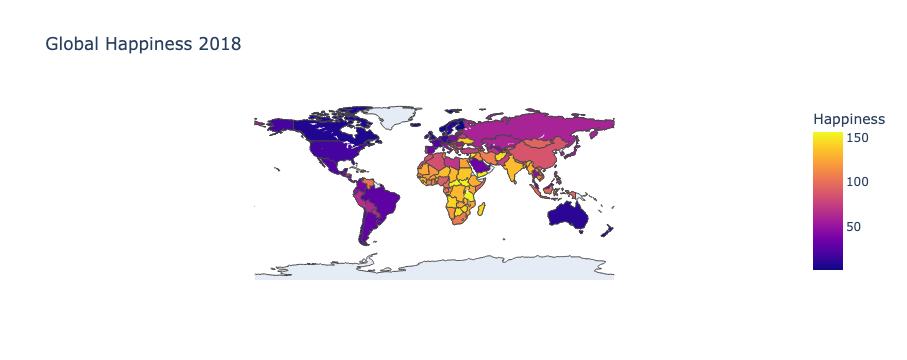

In [52]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
data = dict(type = 'choropleth', 
           locations = df['Country or region'],
           locationmode = 'country names',
           z = df['Overall rank'], 
           text = df['Country or region'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Global Happiness 2018', 
             geo = dict(showframe = False))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

Because Deepnote does not support the plotly.offline library, we probably will not be able to see this output on here. Lets try something else. 

## Pairplot in Seaborn

Upon searching through how other users visualized the data, I came across Kaggle user shajid01 using a Seaborn pairplot, something I hadn't seen before in Math 10. The syntax is one of the most simple I have seen for any data visualization, yet it provides a lot of crucial information. I used the pairplot syntax in the user's code, but I wanted to add extra nuance. I looked up "seaborn pairplot" and was led to a website "Towards Data Science" that showed the different syntax. I scrolled until I found a color option, and utilized this by grouping the colors by continent, as I did previously in the project. I combined these to create the pairplot shown below.

In [53]:
import seaborn as sns

In [57]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Upper Quartile', 'Pred', 'Continent',
       'RegPred', 'PolyPred'],
      dtype='object')

In [65]:
df2 = df.drop(["Perceptions of corruption", "Upper Quartile", "Pred", "RegPred", "PolyPred"], axis=1)
df2

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Continent
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,Europe
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,Europe
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,Europe
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,Europe
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,Europe
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,Asia
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,Africa
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,Africa
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,Africa


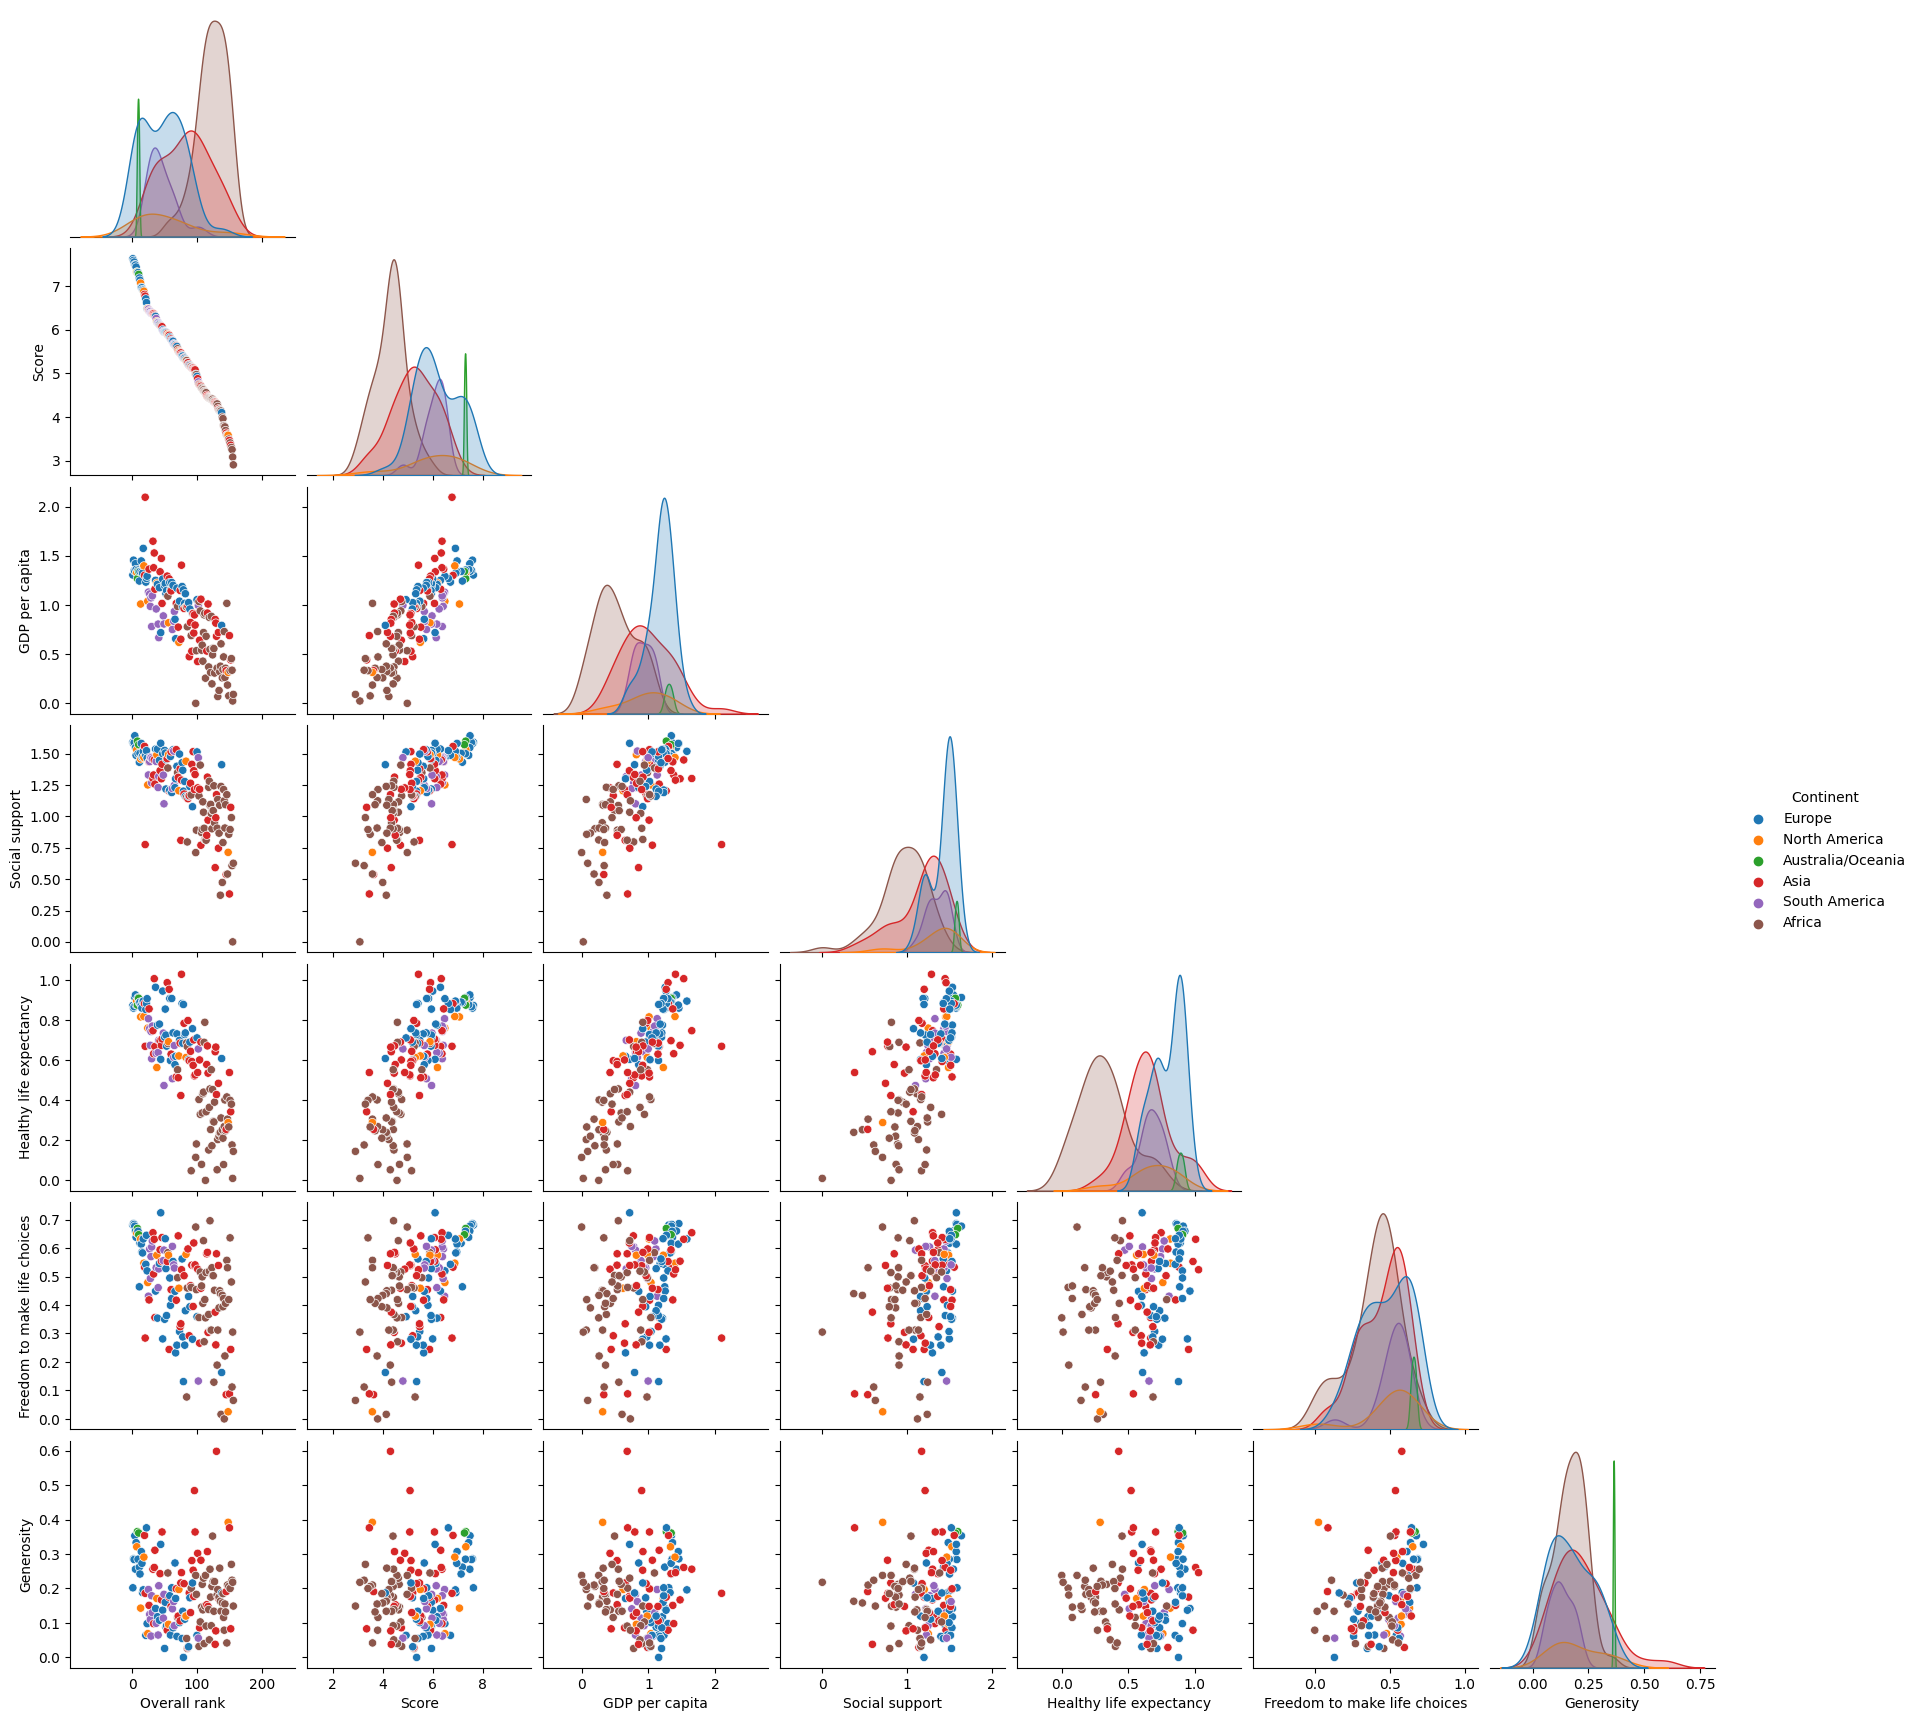

In [66]:
sns.pairplot(data=df2, corner=True, hue = "Continent")

I originally made the pairplot using all of the data columns in df, including those which we had added when creating predictions. This made the pairplot massive, with a lot of cross sections. Upon realizing this, I created a new Dataframe with only the original numeric data type columns. This allowed for a much better and far less chaotic visualization of the data in the pairplot. 

As for what I am looking to gain out of analyzing this data, this happens to be the perfect kind of visualization. Though I could very well create several Altair charts for each combination of variables and find the line of best fit for each of them, this visualization allows me to easily see between two variables if there is a positive or negative relationship, or perhaps no discernible relationship at all. I am able to see a positive relationship between GDP per capita and Social support, and a negative relationship between Freedom to make life choices and Overall rank, just to name a few. These relationships make sense, and we can conclude with some confidence that there is a correlation between certain categories of data.

## Summary
As we can see, there are several factors with a relationship between them in the Happiness Index dataset. Some of these are subjective measures, however, and could be hard to fairly and accurately measure, such as "Generosity" and "Perceptions of corruption". Much more, if they did vary from what they actually are (i.e. different data collection style, different measures for that category), it could greatly impact the country's numerical ranking. Even GDP per capita can be hard to accurately measure, even though it is one of the most objective measures of the factors.

Through this project, I was able to conduct research on a topic and apply my knowledge from this class to another subject. As a Math major, I am not often exposed to other subjects, but I liked the interdisciplinary approach I could take with this, applying the methods of machine learning and data science to politics, economics, and society. I am appreciative of everything I've learned in this class, and have new insight to how useful data analysis can be.

## References

Your code above should include references.  Here is some additional space for references.

* Happiness Index 2018-2019, Sougata Pramanick, Kaggle https://www.kaggle.com/datasets/sougatapramanick/happiness-index-2018-2019?resource=download&select=2018.csv

* World Heart Photo: https://www.google.com/url?sa=i&url=https%3A%2F%2Fgreatergood.berkeley.edu%2Farticle%2Fitem%2Fworld_happiness_report_finds_that_crises_make_us_kinder&psig=AOvVaw14PrJSHxr3An_VBfBHX_4e&ust=1686882826729000&source=images&cd=vfe&ved=0CAQQjB1qFwoTCNj397GexP8CFQAAAAAdAAAAABAD 

- User shajid01's "Data Visualization using Seaborn" on the same dataset on Kaggle: https://www.kaggle.com/code/shajid01/data-visualization-using-seaborn

- Seaborn Pairplot tutorial: https://towardsdatascience.com/seaborn-pairplot-enhance-your-data-understanding-with-a-single-plot-bf2f44524b22

## Submission

Using the Share button at the top right, **enable Comment privileges** for anyone with a link to the project. Then submit that link on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d1ec8b3c-449a-4596-b8fc-a067fc9fc257' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>